# Import and setup

In [1]:
from pynamicalsys import ContinuousDynamicalSystem as cds
from pynamicalsys import PlotStyler

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cds.available_models()

['lorenz system', 'henon heiles', 'rossler system', '4d rossler system']

In [4]:
path_figures = "../images"

# Quickstart

In [18]:
ds = cds(model="lorenz system")

In [19]:
ds.info["parameters"]

['sigma', 'rho', 'beta']

In [20]:
u = [0.1, 0.1, 0.1]
sigma, rho, beta = 10, 28, 8/3
parameters = [sigma, rho, beta]
total_time = 200

In [21]:
trajectory = ds.trajectory(u, total_time, parameters)

<Figure size 640x480 with 0 Axes>

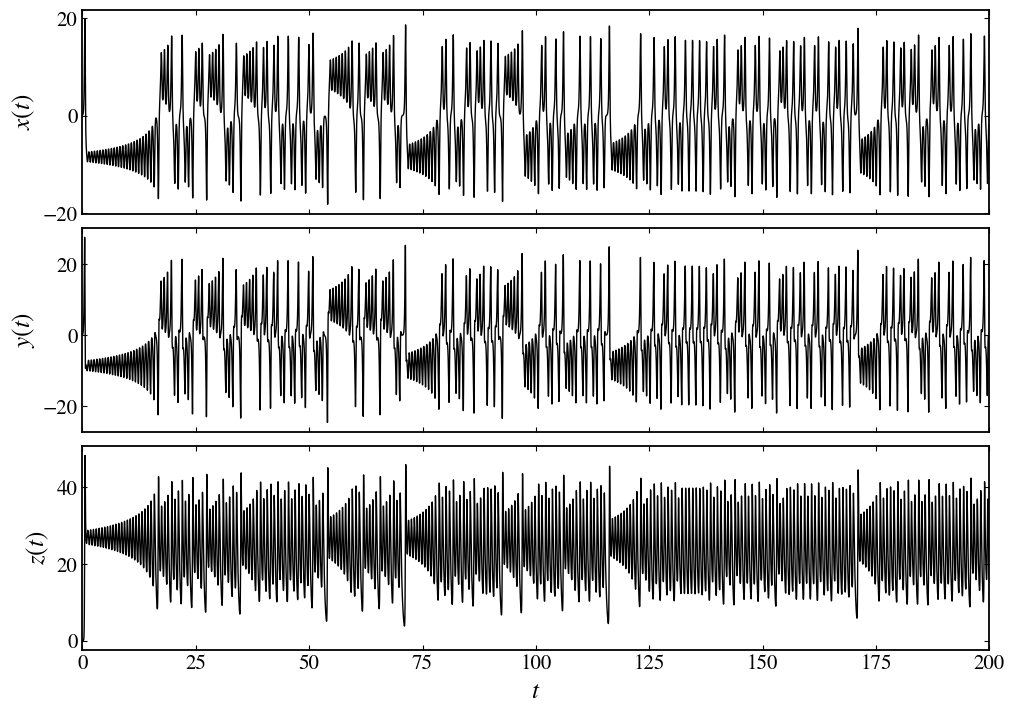

In [22]:
ps = PlotStyler(fontsize=18)
ps.apply_style()
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 7))

for i in range(3):
    ax[i].plot(trajectory[:, 0], trajectory[:, i + 1], "k")
ax[0].set_ylabel("$x(t)$")
ax[1].set_ylabel("$y(t)$")
ax[2].set_ylabel("$z(t)$")
ax[-1].set_xlabel("$t$")

ax[0].set_xlim(0, total_time)
plt.tight_layout(pad=0.1)

plt.savefig(f"{path_figures}/lorenz_time_series.png", dpi=400)

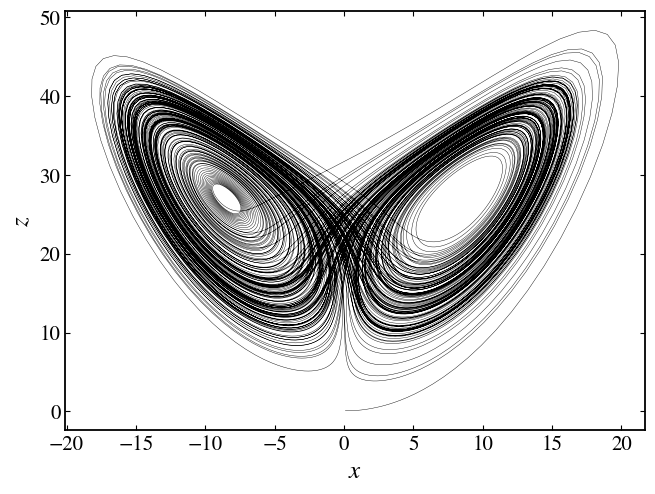

In [23]:
ps = PlotStyler(fontsize=18, linewidth=0.3)
ps.apply_style()

plt.plot(trajectory[:, 1], trajectory[:, 3], "k-")

plt.xlabel("$x$")
plt.ylabel("$z$")

plt.tight_layout(pad=0.1)

plt.savefig(f"{path_figures}/lorenz_attractor.png", dpi=400)

# Generating trajectories

In [24]:
ds = cds(model="lorenz system")

## Using RK4 with fixed time step

In [25]:
ds.integrator("rk4", time_step=0.005)

In [26]:
parameters = [10, 28, 8/3]
u = [0.1, 0.1, 0.1]
total_time = 100

In [27]:
trajectory = ds.trajectory(u, total_time, parameters=parameters)

In [28]:
trajectory.shape

(20001, 4)

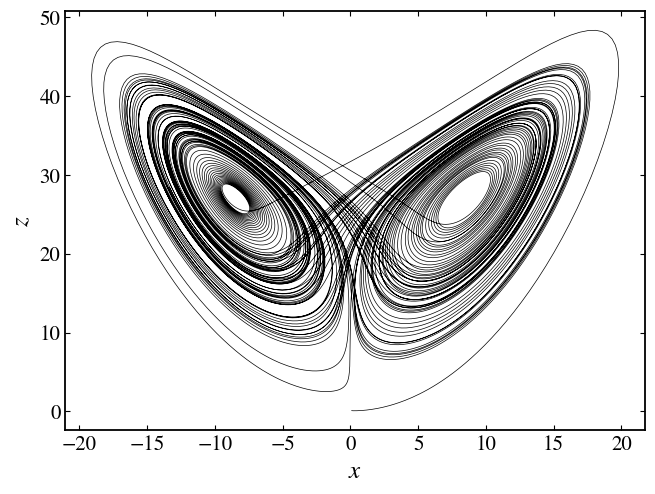

In [29]:
ps = PlotStyler(fontsize=18, linewidth=0.5)
ps.apply_style()
plt.plot(trajectory[:, 1], trajectory[:, 3], "k-")
plt.xlabel("$x$")
plt.ylabel("$z$")
plt.tight_layout(pad=0.1)
plt.savefig(f"{path_figures}/lorenz_rk4.png", dpi=400)

## Using RK45 with adaptive time step

In [30]:
ds.integrator("rk45", atol=1e-8, rtol=1e-8)

In [31]:
parameters = [10, 28, 8/3]
u = [0.1, 0.1, 0.1]
total_time = 100

In [32]:
trajectory = ds.trajectory(u, total_time, parameters=parameters)

In [33]:
trajectory.shape

(10319, 4)

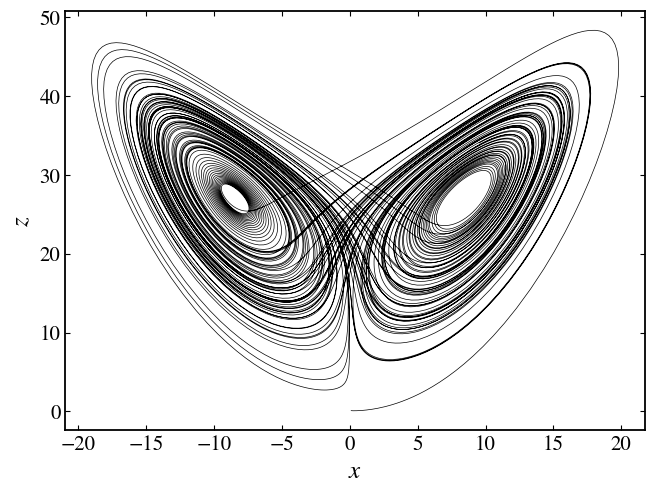

In [34]:
ps = PlotStyler(fontsize=18, linewidth=0.5)
ps.apply_style()
plt.plot(trajectory[:, 1], trajectory[:, 3], "k-")
plt.xlabel("$x$")
plt.ylabel("$z$")
plt.tight_layout(pad=0.1)
plt.savefig(f"{path_figures}/lorenz_rk45.png", dpi=400)

## Multiple initial conditions

In [35]:
ds.integrator("rk45", atol=1e-8, rtol=1e-8)

In [36]:
parameters = [10, 28, 8/3]
u = np.array([0.1, 0.1, 0.1])
num_ic = 5
np.random.seed(13)
u = np.random.uniform(0.1, 0.1 + 1e-5, (num_ic, 3))
total_time = 100

In [37]:
trajectories = ds.trajectory(u, total_time, parameters=parameters)

In [38]:
len(trajectories)

5

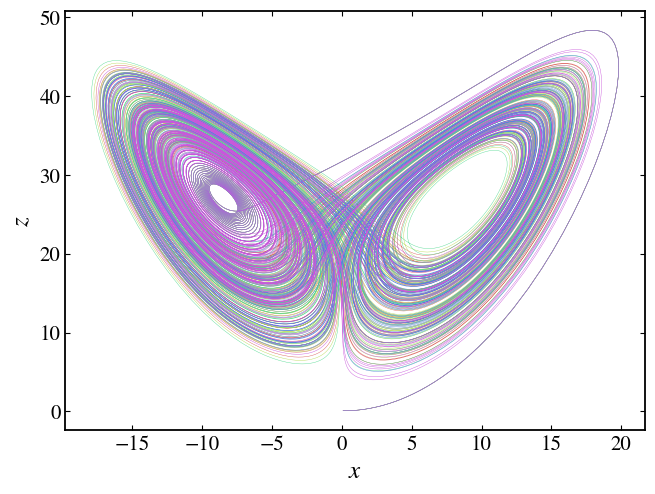

In [39]:
ps = PlotStyler(fontsize=18, linewidth=0.3)
ps.apply_style()

colors = sns.color_palette("hls", num_ic)
for i in range(num_ic):
    plt.plot(trajectories[i][:, 1], trajectories[i][:, 3], "-", color=colors[i])
plt.xlabel("$x$")
plt.ylabel("$z$")
plt.tight_layout(pad=0.1)
plt.savefig(f"{path_figures}/lorenz_rk45_multi.png", dpi=400)

## Hamiltonian system

In [40]:
ds = cds(model="henon heiles")

In [41]:
import numpy as np

def compute_energy(trajectory: np.ndarray) -> np.ndarray:
    """
    Compute energy for a single state or a trajectory of the Hénon-Heiles system.

    Parameters
    ----------
    trajectory : np.ndarray
        Either:
        - shape (N, d+1): trajectory over time (first column is time)
        - shape (d,): a single state vector

    Returns
    -------
    energy : float or np.ndarray
        Energy value(s) computed as:
            E = (x^2 + y^2 + z^2 + w^2)/2 + x^2 * y - y^3 / 3
    """
    if trajectory.ndim == 1:
        x, y, px, py = trajectory[:4]
        return (x**2 + y**2 + px**2 + py**2) / 2 + x**2 * y - y**3 / 3

    elif trajectory.ndim == 2:
        x, y, px, py = trajectory[:, 1:5].T
        return (x**2 + y**2 + px**2 + py**2) / 2 + x**2 * y - y**3 / 3

    else:
        raise ValueError("Input must be a 1D state vector or a 2D trajectory array.")

In [42]:
ds.integrator("rk4", time_step=0.01)

In [43]:
E = 1 / 8
x = 0
y = 0.1
py = 0
px = np.sqrt(2 * (E - x**2 * y + y**3/3) - x**2 - y**2 - py**2)
u = [x, y, px, py]
total_time = 10000

In [44]:
time_steps = [0.1, 0.01, 0.005, 0.001]
energy_vs_time_rk4 = []
times_rk4 = []
for time_step in time_steps:
    
    ds.integrator("rk4", time_step=time_step)
    
    trajectory = ds.trajectory(u, total_time)
    
    times_rk4.append(trajectory[:, 0])
    energy_vs_time_rk4.append(compute_energy(trajectory))

In [45]:
len(energy_vs_time_rk4)

4

In [46]:
atols = [1e-8, 1e-10, 1e-12, 1e-14]
rtols = [1e-8, 1e-10, 1e-12, 1e-14]

atols = [1e-10, 1e-10, 1e-10, 1e-15, 1e-15, 1e-15]
rtols = [1e-10, 1e-13, 1e-15, 1e-10, 1e-13, 1e-15]

labels = ["$(10^{-10}, 10^{-10})$", "$(10^{-10}, 10^{-13})$", "$(10^{-10}, 10^{-15})$", "$(10^{-15}, 10^{-10})$", "$(10^{-15}, 10^{-13})$", "$(10^{-15}, 10^{-15})$"]
energy_vs_time_rk45 = []
times_rk45 = []
for j in range(len(atols)):
    atol = atols[j]
    rtol = rtols[j]
    ds.integrator("rk45", rtol=rtol, atol=atol)
    trajectory = ds.trajectory(u, total_time)

    times_rk45.append(trajectory[:, 0])
    energy_vs_time_rk45.append(compute_energy(trajectory))

<Figure size 640x480 with 0 Axes>

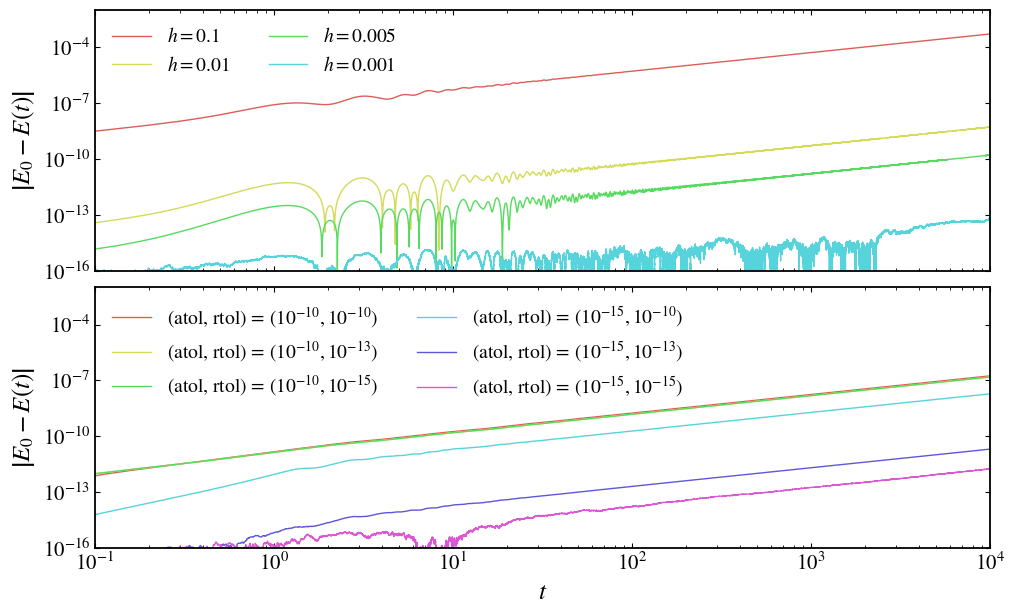

In [47]:
ps = PlotStyler(fontsize=18, linewidth=1)
ps.apply_style()
colors = sns.color_palette("hls", len(atols))

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 6))
[ax[0].plot(times_rk4[i], abs(E - energy_vs_time_rk4[i]), label=f"$h = {time_steps[i]}$", color=colors[i]) for i in range(len(time_steps))]
[ax[1].plot(times_rk45[i], abs(E - energy_vs_time_rk45[i]), color=colors[i], label=f"(atol, rtol) = {labels[i]}") for i in range(len(atols))]
ax[0].legend(loc="upper left", ncol=2, frameon=False)
ax[1].legend(loc="upper left", ncol=2, frameon=False)
ax[0].set_yscale("log")
ax[0].set_ylabel(r"$\left |E_0 - E(t) \right|$")
ax[1].set_ylabel(r"$\left |E_0 - E(t)\right|$")
ax[0].set_xlim(0.1, total_time)
ax[1].set_xlabel("$t$")
ax[1].set_ylim(1e-16, 1e-2)
ax[0].set_xscale("log")

plt.tight_layout(pad=0.1)
plt.savefig(f"{path_figures}/henon_heiles_energy.png", dpi=400)

# Chaotic indicators

## Lyapunov exponents

### Rössler system

In [78]:
ds = cds(model="rossler system")
ds.integrator("rk45", atol=1e-15, rtol=1e-15)

In [79]:
a, b, c = 0.15, 0.20, 10
parameters = [a, b, c]
u = [0.1, 0.1, 0.1]
total_time = 2000
transient_time = 1000

In [80]:
trajectory = ds.trajectory(u, total_time, parameters=parameters, transient_time=transient_time)

<Figure size 640x480 with 0 Axes>

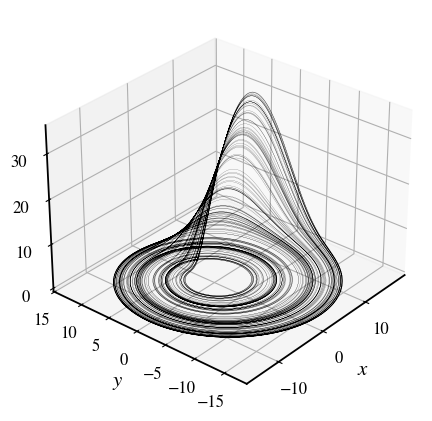

In [81]:
ps = PlotStyler(fontsize=15, linewidth=0.1)
ps.apply_style()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5, 4))
ax.plot(
    trajectory[:, 1], trajectory[:, 2], trajectory[:, 3], label="Trajectory", color="k"
)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.view_init(elev=30, azim=-140)
plt.tight_layout(pad=0.1)
plt.savefig(f"{path_figures}/rossler_attractor.png", dpi=400)

In [82]:
total_time = 10000

In [83]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)

array([ 8.85904935e-02,  3.79977112e-04, -9.79609154e+00])

In [84]:
print(ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, log_base=2))

[ 1.27809066e-01  5.48191095e-04 -1.41327727e+01]


In [85]:
lyapunov_exponents = ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time, return_history=True)

In [86]:
lyapunov_exponents.shape

(128607, 4)

<Figure size 640x480 with 0 Axes>

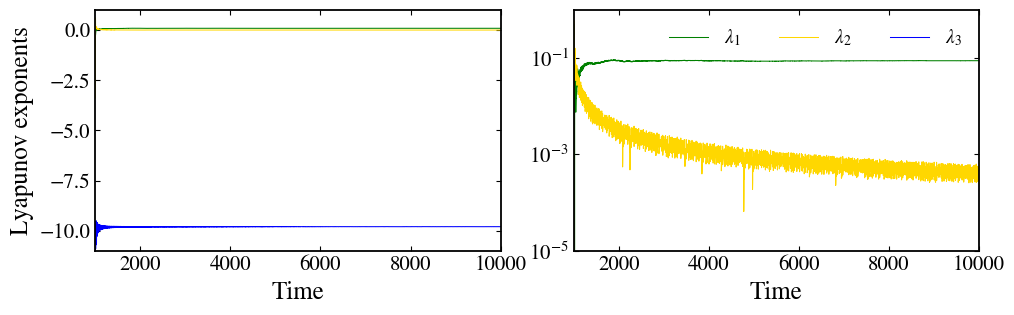

In [87]:
ps = PlotStyler(fontsize=18, linewidth=0.75)
ps.apply_style()
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharex=True)

colors = ["green", "gold", "blue"]
for i in range(3):
    ax[0].plot(lyapunov_exponents[:, 0], lyapunov_exponents[:, i + 1], color=colors[i])
    ax[1].plot(
        lyapunov_exponents[:, 0],
        lyapunov_exponents[:, i + 1],
        color=colors[i],
        label=rf"$\lambda_{i + 1}$",
    )
ax[1].legend(frameon=False, ncol=3)
ax[0].set_ylim(-11, 1)
ax[1].set_ylim(1e-5, 1e0)
ax[0].set_xlim(transient_time, total_time)
ax[1].set_yscale("log")

ax[0].set_ylabel("Lyapunov exponents")
ax[0].set_xlabel("Time")
ax[1].set_xlabel("Time")

plt.tight_layout(pad=0.1)
plt.savefig(f"{path_figures}/rossler_lyapunov.png", dpi=400)

### 4D Rössler system

In [5]:
ds = cds(model="4d rossler system")

In [6]:
a, b, c, d = 0.25, 3.0, 0.5, 0.05
parameters = [a, b, c, d]
u = [-20, 0, 0, 15]
total_time = 100000
transient_time = 1000

In [14]:
ds.integrator("rk45", atol=1e-15, rtol=1e-15)
ds.integrator("rk4", time_step=0.01)

In [15]:
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)

array([ 1.12899969e-01,  2.09239781e-02,  6.92114346e-06, -2.49507041e+01])

In [ ]:
lyapunov_exponents = ds.lyapunov(
    u,
    total_time,
    parameters=parameters,
    transient_time=transient_time,
    return_history=True)

<Figure size 640x480 with 0 Axes>

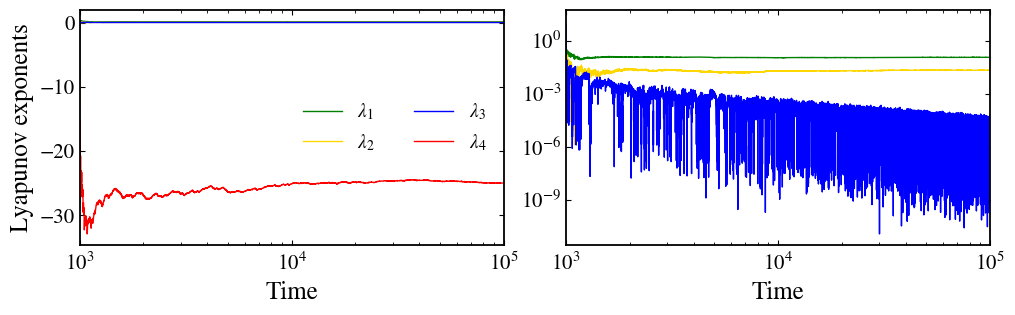

In [ ]:
ps = PlotStyler(fontsize=18)
ps.apply_style()

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 3))
ps.set_tick_padding(ax[0], pad_x=6)
ps.set_tick_padding(ax[1], pad_x=6)
colors = ["green", "gold", "blue", "red"]
for i in range(4):
    ax[0].plot(
        lyapunov_exponents[:, 0],
        lyapunov_exponents[:, i + 1],
        color=colors[i],
        label=rf"$\lambda_{i + 1}$")

for i in range(3):
    ax[1].plot(
        lyapunov_exponents[:, 0],
        abs(lyapunov_exponents[:, i + 1]),
        color=colors[i],
        label=rf"$\lambda_{i + 1}$")

ax[0].legend(loc="center right", frameon=False, ncol=2)
ax[0].set_ylabel("Lyapunov exponents")
ax[0].set_xlabel("Time")
ax[1].set_xlabel("Time")
ax[0].set_xlim(transient_time, total_time)
ax[1].set_yscale("log")
ax[1].set_xscale("log")

plt.tight_layout(pad=0.1)
plt.savefig(f"{path_figures}/rossler4d_lyapunov.png", dpi=400)

## Linear dependence index

### Rössler system

In [88]:
ds = cds(model="rossler system")
ds.integrator("rk45", atol=1e-15, rtol=1e-15)

In [89]:
a, b, c = 0.15, 0.20, 10
parameters = [a, b, c]
u = [0.1, 0.1, 0.1]
total_time = 2000
transient_time = 1000

In [ ]:
ldi = []
for k in (2, 3):
    ldi.append(ds.LDI(u, total_time, 2, parameters=parameters, transient_time=transient_time, return_history=True))

In [91]:
ldi3 = ds.LDI(u, total_time, 3, parameters=parameters, transient_time=transient_time, return_history=True)

<Figure size 640x480 with 0 Axes>

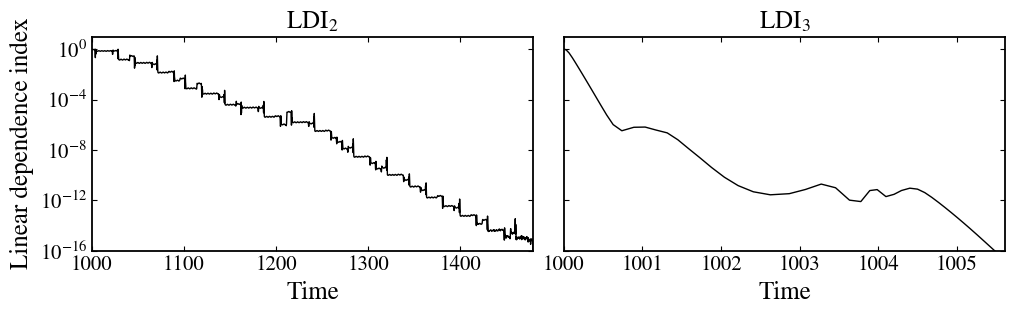

In [92]:
ps = PlotStyler(fontsize=18)
ps.apply_style()

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 3))
ax[0].plot(ldi2[:, 0], ldi2[:, 1], color="k")
ax[0].set_yscale("log")
ax[0].set_ylim(1e-16, 1e1)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Linear dependence index")
ax[0].set_title("LDI$_2$", fontsize=18)
ax[0].set_xlim(transient_time, ldi2[-1, 0])

ax[1].plot(ldi3[:, 0], ldi3[:, 1],"k-")
ax[1].set_xlabel("Time")
ax[1].set_title("LDI$_3$", fontsize=18)
ax[1].set_xlim(transient_time, ldi3[-1, 0])

plt.tight_layout(pad=0.1, w_pad=0.4)
plt.savefig(f"{path_figures}/rossler_ldi.png", dpi=400)


### 4D Rössler system

In [99]:
ds = cds(model="4d rossler system")
ds.integrator("rk45", atol=1e-15, rtol=1e-15)

In [100]:
a, b, c, d = 0.25, 3.0, 0.5, 0.05
parameters = [a, b, c, d]
u = [-20, 0, 0, 15]
total_time = 2000
transient_time = 1000

In [101]:
ldi2 = ds.LDI(u, total_time, 2, parameters=parameters, transient_time=transient_time, return_history=True)

In [102]:
ldi3 = ds.LDI(u, total_time, 3, parameters=parameters, transient_time=transient_time, return_history=True)

In [103]:
ldi4 = ds.LDI(u, total_time, 4, parameters=parameters, transient_time=transient_time, return_history=True)

<Figure size 640x480 with 0 Axes>

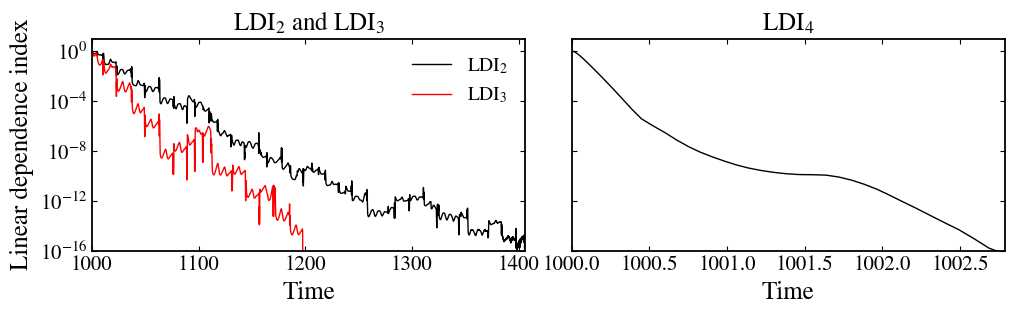

In [104]:
ps = PlotStyler(fontsize=18)
ps.apply_style()

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 3))
ax[0].plot(ldi2[:, 0], ldi2[:, 1], color="k", label="LDI$_2$")
ax[0].plot(ldi3[:, 0], ldi3[:, 1], "r-", label="LDI$_3$")
ax[0].set_yscale("log")
ax[0].set_ylim(1e-16, 1e1)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Linear dependence index")
ax[0].set_title("LDI$_2$ and LDI$_3$", fontsize=18)
ax[0].set_xlim(transient_time, ldi2[-1, 0])
ax[0].legend(loc="upper right", frameon=False)


ax[1].plot(ldi4[:, 0], ldi4[:, 1], "k-")
ax[1].set_xlabel("Time")
ax[1].set_title("LDI$_4$", fontsize=18)
ax[1].set_xlim(transient_time, ldi4[-1, 0])

plt.tight_layout(pad=0.1, w_pad=0.4)
plt.savefig(f"{path_figures}/rossler4d_ldi.png", dpi=400)